In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data_depi/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


check if we  have NAN values and duplicate in our dataset

In [6]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.duplicated().sum()

0

In [8]:
#statistical overview
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df['Spending Score (1-100)'].skew()

-0.047220201374263374

In [10]:
df_corr=df.drop(['Gender','CustomerID'],axis=1)
df_corr.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

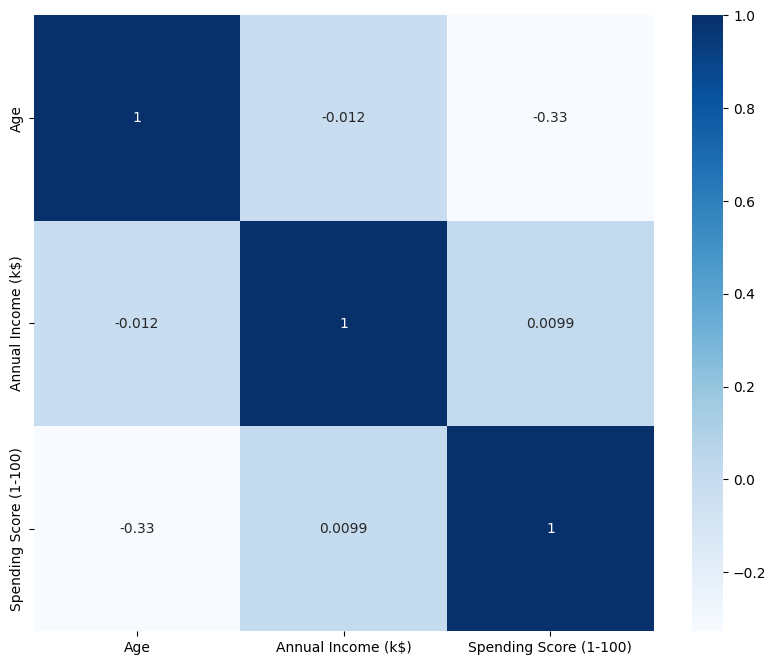

In [11]:
#  visualization correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(),annot=True,cmap='Blues')


In [12]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


# Detection outliers



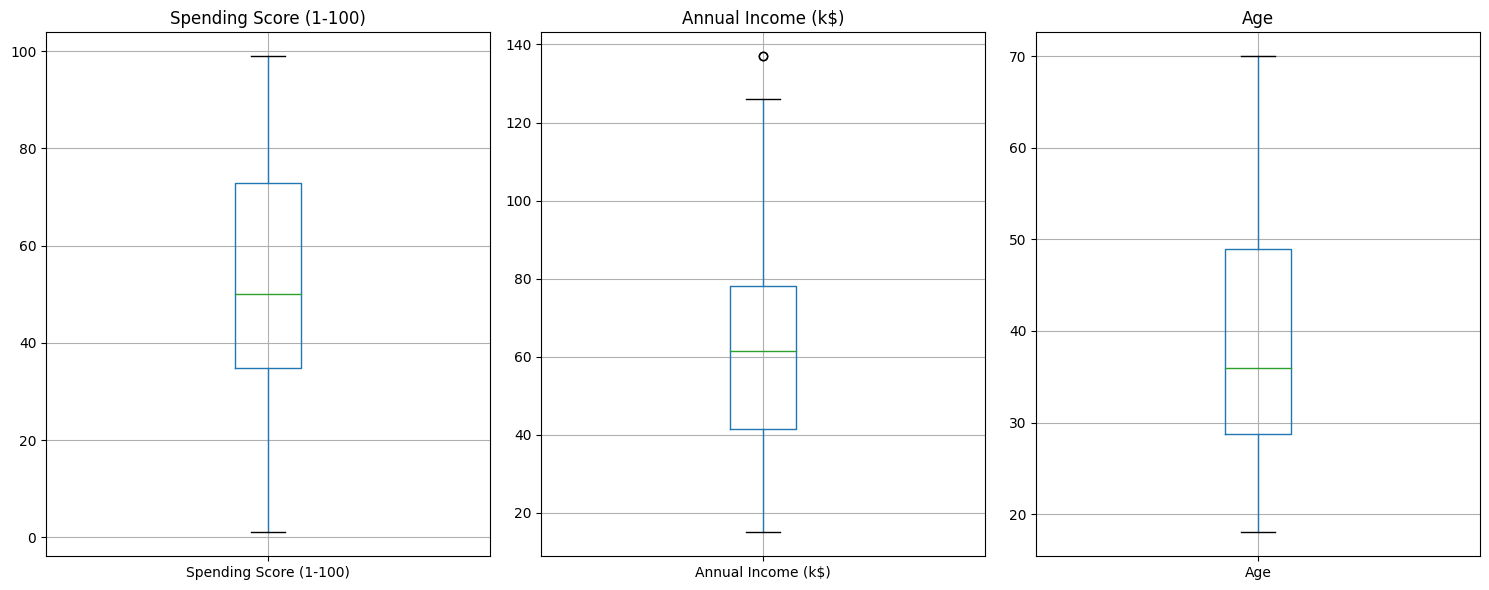

In [13]:
# Set the figure size
plt.figure(figsize=(15,6))

# First subplot
plt.subplot(1, 3, 1)
fig1 = df.boxplot(column=['Spending Score (1-100)'])
fig1.set_title('Spending Score (1-100)')

# Second subplot
plt.subplot(1, 3, 2)
fig2 = df.boxplot(column=['Annual Income (k$)'])
plt.title('Annual Income (k$)')

# Third subplot
plt.subplot(1, 3, 3)
fig3 = df.boxplot(column=['Age'])
fig3.set_title('Age')

# Display the plots
plt.tight_layout()
plt.show()


# Visualization

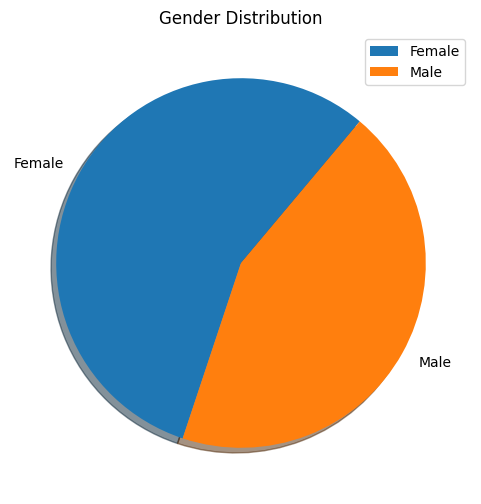

In [14]:
#Gander Distribution
fig , ax = plt.subplots(figsize=(6,6))
ax.set_title('Gender Distribution')
ax.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,shadow=True, startangle=50)
ax.legend()

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

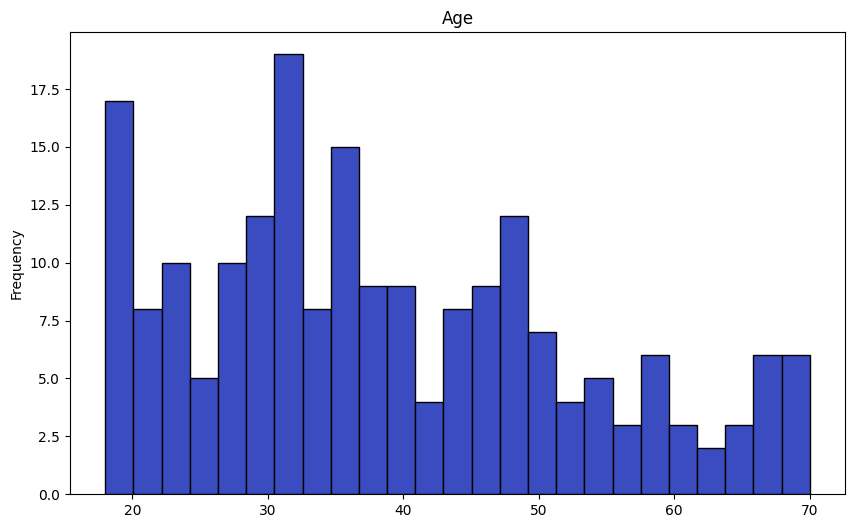

In [15]:
# Age Frequency
df['Age'].plot(kind='hist', bins=25, title='Age',edgecolor='black',figsize=(10,6),cmap='coolwarm')



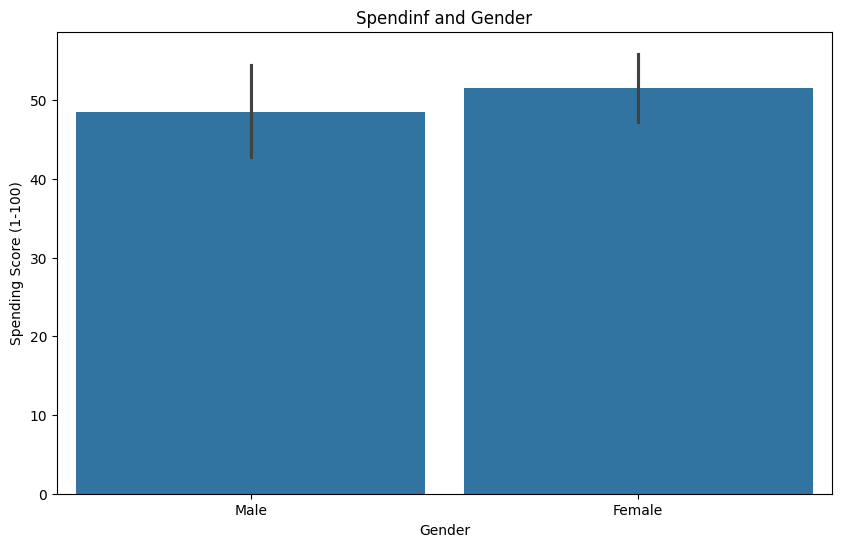

In [16]:
#spending and Gender
fig, ax=plt.subplots (figsize=(10,6))
plt.title("Spendinf and Gender")
ax=sns.barplot(x='Gender',y='Spending Score (1-100)',data=df,width=0.9)

<Axes: title={'center': 'Age and Spending scores'}, xlabel='Age', ylabel='Spending Score (1-100)'>

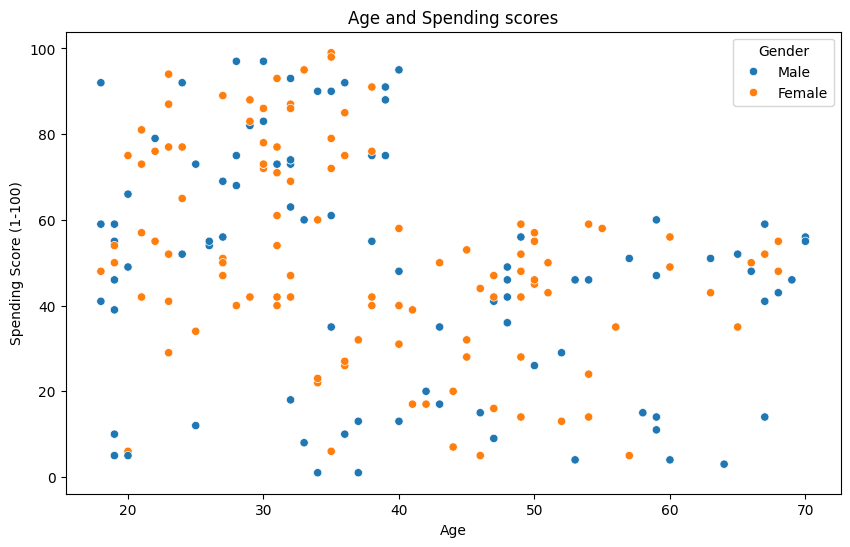

In [17]:
# Age and Spending scores
fig , ax = plt.subplots(figsize=(10,6))
plt.title('Age and Spending scores')
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df,hue='Gender')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

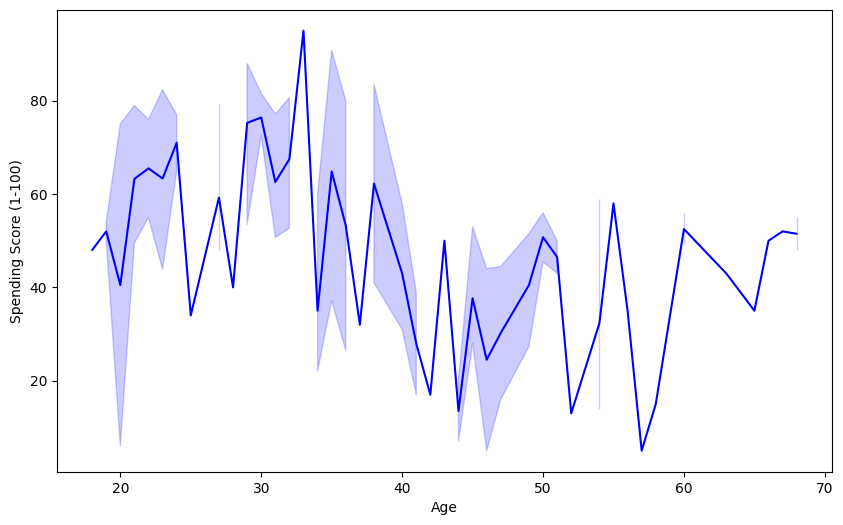

In [18]:
#visualize only the data for females
df_female=df[df['Gender']=='Female']


fig, ax=plt.subplots (figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Age", y="Spending Score (1-100)",data=df_female,color='Blue',estimator=np.mean)


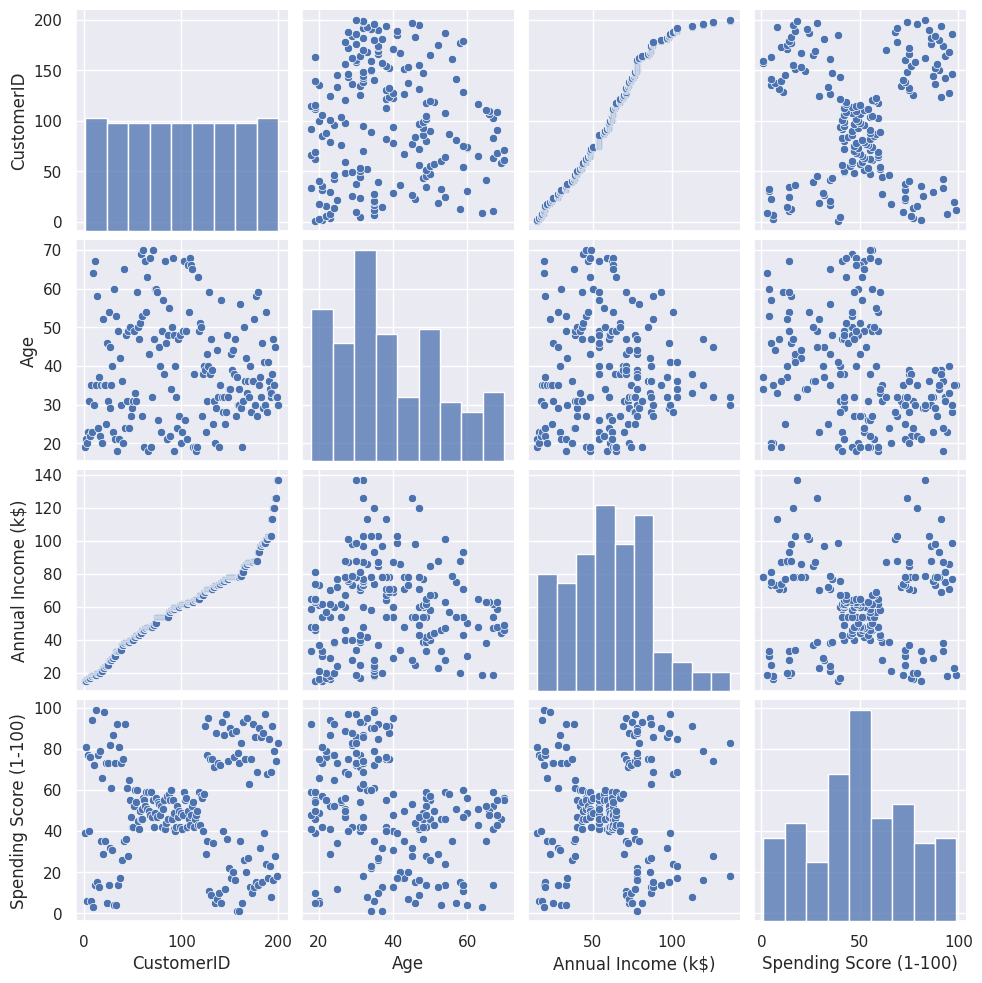

In [19]:
#summraize analysis
sns.pairplot(df)

#Data preprocessing

In [20]:
# we are gonna use label encoding for column "Gender"
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA





Le=LabelEncoder()
df['Gender']=Le.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [21]:
# Get the mapping of original values to encoded values
mapping = dict(zip(Le.classes_, Le.transform(Le.classes_)))
print(mapping)


{'Female': 0, 'Male': 1}


In [22]:
# we dont need column 'CustomerID'in our dataset
df.drop(['CustomerID'],inplace=True,axis=1)



In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [24]:
# we are ganna make features scaling using StanderdScaler for more simplicity
#After scaling our data to an array, we need to convert it back to a dataframe.
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [25]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [26]:
# WE are gonna use PCA for reduce dimension , cuz we need to know best number of clusters
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)
df_pca


array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

#**Clustering**

In [27]:
# Now We Hvae 2D dimensions and we can use WCSS
# WCSS== within cluster sum of squares == inertial
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

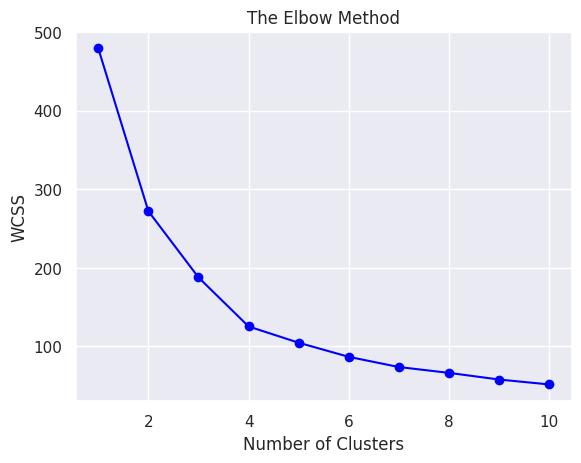

In [28]:
# prompt: visualization WCSS
# plot the WCSS
plt.plot(range(1,11),wcss,marker='o',color='Blue')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [29]:
# I Think 🤔  K=4 is the best for our data
Model_kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
predicted =Model_kmeans.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


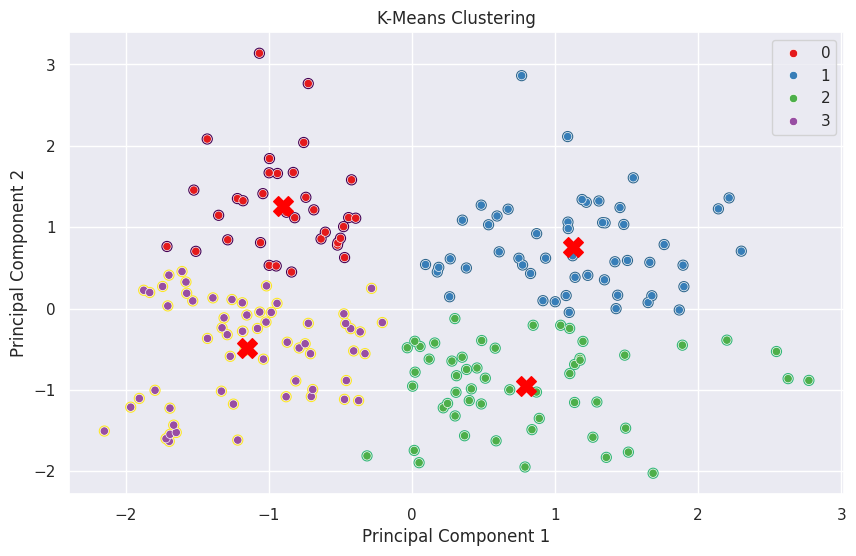

In [30]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predicted, s=50, cmap='viridis')
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=predicted, palette='Set1')


# centers visualization
centers = Model_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1, marker="X")


plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [31]:
from sklearn.metrics import silhouette_score


# Calculate the silhouette score
silhouette_avg = silhouette_score(df_pca, predicted)
print("Silhouette score:", silhouette_avg)


Silhouette score: 0.4164156778177486


In [32]:
# adding predictions into our data
df['Cluster']=predicted
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


In [33]:
df['Cluster'].value_counts().sort_values(ascending=False)


,count
Cluster,
3,61
2,54
1,51
0,34


# Result of Clustering

In [34]:
# Calculate descriptive statistics for each cluster
cluster_stats_mean= df.groupby('Cluster').mean()
print(cluster_stats_mean)


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.823529  29.911765           81.500000               73.882353
1        0.823529  47.647059           74.627451               30.862745
2        0.129630  49.222222           46.222222               34.000000
3        0.180328  27.295082           49.819672               67.508197


In [35]:
cluster_State_STD=df.groupby('Cluster').std()
print('Cluster_STD:\n',cluster_State_STD)

Cluster_STD:
            Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.386953   6.703087           22.774587               16.629227
1        0.385013  13.395258           23.044271               18.026669
2        0.339050  10.555633           18.963387               17.882214
3        0.387651   5.559809           22.880493               18.164639


In [36]:
cluster_stat_median=df.groupby('Cluster').median()
print('Cluster_median:\n',cluster_stat_median)

Cluster_median:
          Gender   Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                          
0           1.0  31.0                77.5                    75.0
1           1.0  48.0                73.0                    32.0
2           0.0  49.0                47.5                    40.0
3           0.0  28.0                48.0                    73.0


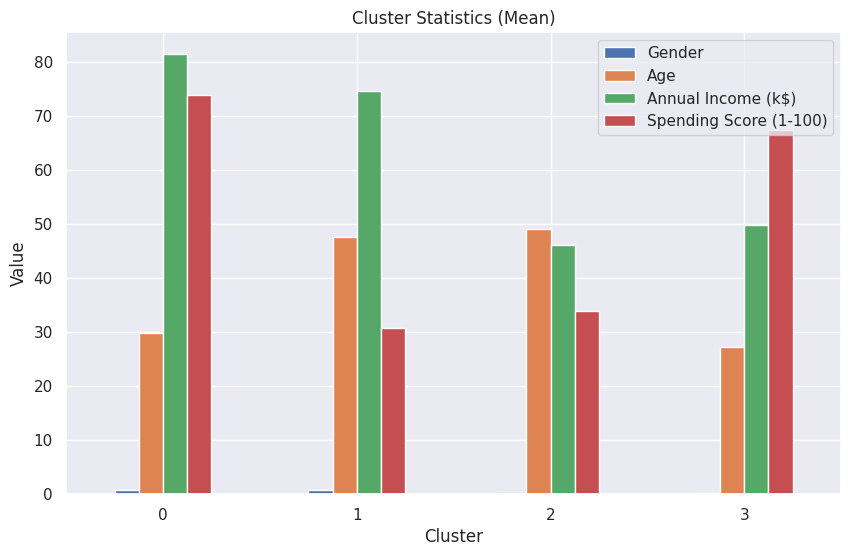

In [41]:
# Visualize the cluster statistics (mean)
cluster_stats_mean.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Statistics (Mean)')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()
